## The Sparks Foundation
## Data Science and Business Analytics Intern 
## Task : 1 (Prediction using Supervised ML)
## Name : Mudisetty Jyothi

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.api import add_constant,OLS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [51]:
data = {'Hours': [2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8],
'Scores': [21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30, 24, 67, 69, 30, 54, 35, 76, 86]}

In [52]:
df=pd.DataFrame(data)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Checking the correlation 

In [33]:
df['Hours'].corr(df['Scores'])

0.9761906560220885

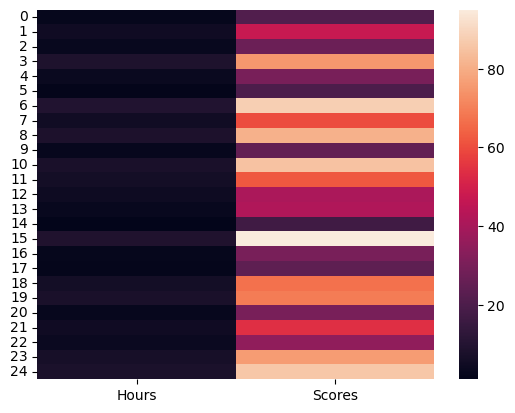

In [34]:
sns.heatmap(df)
plt.show()

* It has a  strong positive correlation 

In [35]:
x=df[['Hours']] #  feature/attribute
y= df['Scores'] # target
x_train, x_test, y_train, y_test = train_test_split( x, y, train_size = 0.7, test_size = 0.3, random_state = 1 )


In [36]:
print( x_train.shape )
print( x_test.shape )
print( y_train.shape )
print( y_test.shape )

(17, 1)
(8, 1)
(17,)
(8,)


## Model Building

In [55]:
x_train_sm = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_sm).fit()

In [56]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     456.7
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           1.21e-12
Time:                        22:33:05   Log-Likelihood:                -49.870
No. Observations:                  17   AIC:                             103.7
Df Residuals:                      15   BIC:                             105.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5123      2.691     -0.562      0.5

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [40]:
# Add a constant to X_test
x_test_sm = sm.add_constant(x_test)


# What will be predicted score if a student studies 9.25hrs/day?

In [42]:
# Predict the y values corresponding to X_test_sm
y_pred = model.predict(x_test_sm)

In [43]:
x_test_sm.head()

,const,Hours
14,1.0,1.1
13,1.0,3.3
17,1.0,1.9
3,1.0,8.5
21,1.0,4.8


In [45]:
model.predict([1.0,9.25])

array([94.78722213])

* The predicted score is 94.7 if a student studies 9.25 hrs/day.

# Model Evaluation

In [57]:
y_pred = model.predict(x_test_sm)
#RMSE value
print("RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred )))
#R-squared value
print("R-squared: ",r2_score( y_test, y_pred ))

RMSE:  7.489481350911207
R-squared:  0.8933827573294113
